In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\archive (13)\Restaurant_Reviews.tsv',sep = '\t')

In [5]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Review columns consists of Customer Reviews and Like row consist of 0 and 1. If the review is positive, 1 if the review is negative, 0.

In [7]:
df.shape

(1000, 2)

In [9]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [11]:
#Check if dataset is balanced or not
df.Liked.value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

Thus the dataset is balanced

In [14]:
#Taking the character count of 'Review' column
df['Char_Count'] = df['Review'].apply(len)

In [16]:
df.head()

,Review,Liked,Char_Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [18]:
df['Word_Count'] = df['Review'].apply(lambda x:len(str(x).split()))

In [20]:
df.head()

,Review,Liked,Char_Count,Word_Count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [22]:
import nltk

In [26]:
nltk.download('punkt')      #Used for sentence tokenisation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# import nltk
# nltk.download('punkt')

# df['Sent_Count'] = df['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [34]:
#Average character count for positive reviews
df[df['Liked']==1]['Char_Count'].mean()

55.88

In [36]:
#Average character count for negative reviews
df[df['Liked']==0]['Char_Count'].mean()

60.75

In [38]:
import re

In [44]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
my_stopwords = {"don","don't","ain","aren","aren't","couldn","couldn't","didn","didn't","doesn","doesn't","hadn","hadn't",
               "hasn","hasn't","haven","haven't","isn","isn't","ma","mightn","mightn't","mustn","mustn't","needn","needn't",
               "shan","shan't","no","nor","not","shouldn","shouldn't","wasn","wasn't","weren","weren't","won","won't","wouldn",
               "wouldn't"}
corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - my_stopwords
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [46]:
df['Cleaned_Data'] = corpus
df.head()

,Review,Liked,Char_Count,Word_Count,Cleaned_Data
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


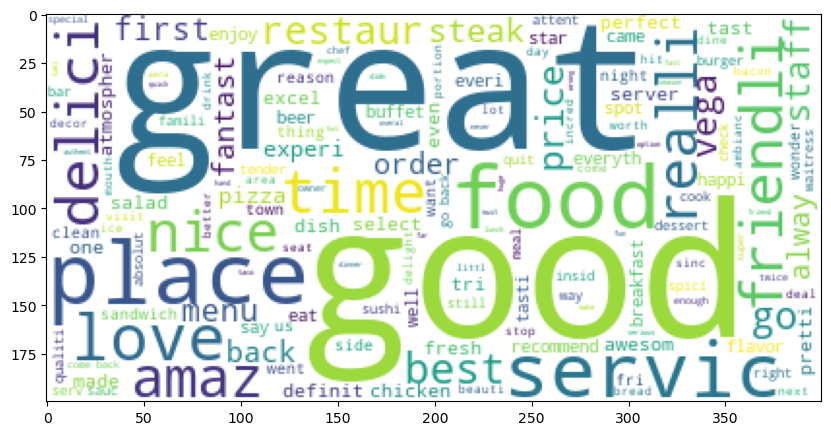

In [48]:
from wordcloud import WordCloud 
wc = WordCloud(background_color = 'white')
plt.figure(figsize=(10,10))
positive = wc.generate(df[df['Liked']==1]['Cleaned_Data'].str.cat(sep=" "))
plt.imshow(positive)

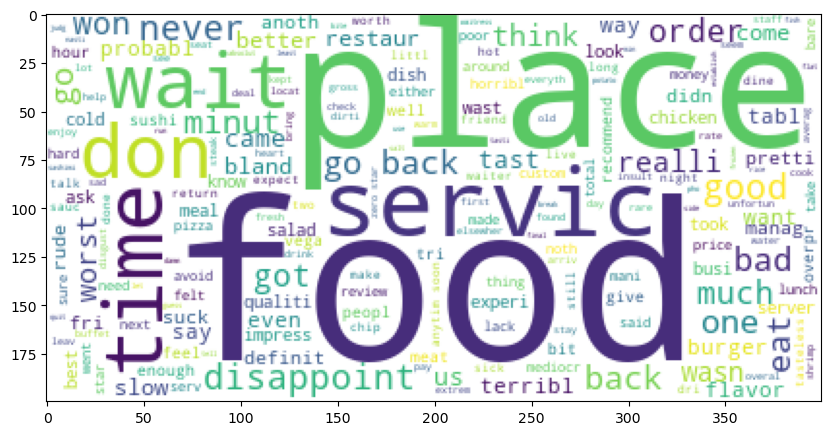

In [50]:
plt.figure(figsize=(10,10))
negative = wc.generate(df[df['Liked']==0]['Cleaned_Data'].str.cat(sep=" "))
plt.imshow(negative)

In [52]:
df.head()

,Review,Liked,Char_Count,Word_Count,Cleaned_Data
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()

In [60]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
x.shape

(1000, 1500)

In [64]:
y = df['Liked']

In [68]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred)

0.68

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()

lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
print('Accuracy score for Logistic Regression: ',accuracy_score(y_test,y_pred1))

Accuracy score for Logistic Regression:  0.79


In [84]:
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)
print('Accuracy score for Random Forest: ',accuracy_score(y_test,y_pred2))

Accuracy score for Random Forest:  0.795


Lets go ahead with Random Forest

In [87]:
import pickle

In [91]:
filename = 'Restaurant.sav'
pickle.dump(rf,open(filename,'wb'))
loaded_model = pickle.load(open('Restaurant.sav','rb'))

In [97]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
y_train

29     0
535    1
695    0
557    0
836    1
      ..
106    1
270    1
860    1
435    0
102    1
Name: Liked, Length: 800, dtype: int64